#### Copyright © 2023 Taeyoung Kim and Mingi Kang. All rights reserved. ####

This is the solution for the homework assignment of the Machine Learning and Optimization lecture for WS2023. 

In [1]:
# libraries

import numpy as np
from matplotlib import pyplot as plt

### Problem 5.

In [2]:
# Generate Data
def generate_data(n, theta_1=1, theta_0=1, sigma=1):
    alphas = np.random.uniform(-1, 1, n)
    y_star = theta_1 * alphas + theta_0
    y = y_star + sigma * np.random.randn(n)
    return alphas, y, y_star

In [3]:
# Polynomial Fit & Error
def polynomial_fit_and_error(alpha, y, y_star, D):
    p = np.poly1d(np.polyfit(alpha, y, D))
    return ((p(alpha) - y_star)**2).mean()

In [4]:
# Simulation for a given D and n
def simulate(D, n, n_trials=1000):
    errors = [polynomial_fit_and_error(*generate_data(n), D) for _ in range(n_trials)]
    return np.mean(errors)

In [5]:
# Parameterr
Ds = list(range(1, 10))
ns = [10, 20, 50, 100, 200]
n_trials = 1000
mse = np.zeros((len(ns), len(Ds)))

In [6]:
# Loop to compute Mean Squared Error
for i, n in enumerate(ns):
    for j, D in enumerate(Ds):
        mse[i, j] = simulate(D, n, n_trials)

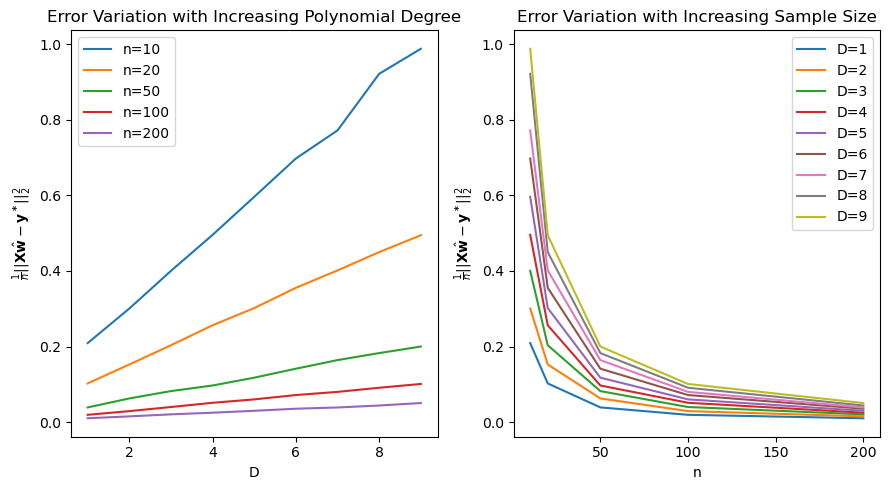

In [7]:
# Plot
plt.figure(figsize=(9,5))


plt.subplot(1, 2, 1)
for i, n in enumerate(ns):
    plt.plot(Ds, mse[i, :], label=f'n={n}')
plt.title('Error Variation with Increasing Polynomial Degree')
plt.ylabel(r'$\frac{1}{n}||\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}||_2^2$')
plt.xlabel('D')
plt.legend()


plt.subplot(1, 2, 2)
for j, D in enumerate(Ds):
    plt.plot(ns, mse[:, j], label=f'D={D}')
plt.title('Error Variation with Increasing Sample Size')
plt.ylabel(r'$\frac{1}{n}||\mathbf{X}\hat{\mathbf{w}} - \mathbf{y^*}||_2^2$')
plt.xlabel('n')
plt.legend()



plt.tight_layout()
plt.show()

### Problem 6

In [8]:
def generate_data_sixth(n):
    alphas = np.random.uniform(-4, 3, n)
    y_star = np.exp(alphas)
    y = y_star + np.random.randn(n)  # Add Gausssche noise
    return alphas, y, y_star

def polynomial_fit_and_error(alpha, y, y_star, D):
    p = np.poly1d(np.polyfit(alpha, y, D))
    return ((p(alpha) - y_star)**2).mean()

def simulate_six(D, n, n_trials=1000):
    errors = [polynomial_fit_and_error(*generate_data_sixth(n), D) for _ in range(n_trials)]
    return np.mean(errors)

In [9]:
# Parameters
Ds = list(range(1, 10))
ns = [10, 20, 50, 120]
n_trials = 1000
mse = np.zeros((len(ns), len(Ds)))

for i, n in enumerate(ns):
    for j, D in enumerate(Ds):
        mse[i, j] = simulate_six(D, n, n_trials)

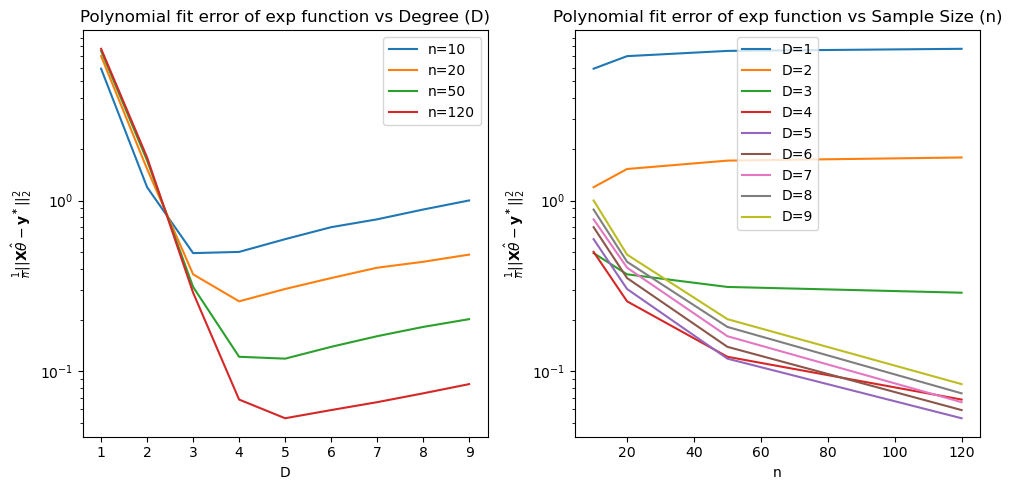

In [10]:
# Plotting
plt.figure(figsize=(10, 5))

# Scaling with D
plt.subplot(1, 2, 1)
for i, n in enumerate(ns):
    plt.semilogy(Ds, mse[i, :], label=f'n={n}')

plt.title('Polynomial fit error of exp function vs Degree (D)')
plt.ylabel(r'$\frac{1}{n}||\mathbf{X}\hat{\theta} - \mathbf{y^*}||_2^2$')
plt.xlabel('D')
plt.legend()

# Scaling with n
plt.subplot(1, 2, 2)
for j, D in enumerate(Ds):
    plt.semilogy(ns, mse[:, j], label=f'D={D}')

plt.title('Polynomial fit error of exp function vs Sample Size (n)')
plt.ylabel(r'$\frac{1}{n}||\mathbf{X}\hat{\theta} - \mathbf{y^*}||_2^2$')
plt.xlabel('n')
plt.legend()

plt.tight_layout()
plt.show()


### Problem 7

**Problem 5**:
- Underlying model: **Linear**.
- Polynomial-based OLS estimate is **unbiased**; no intrinsic approximation error.
- **Variance increases** with polynomial degree 'D', leading to rising prediction error

**Problem 6**:
- Underlying function: **Exponential**.
- Polynomials can't represent this exactly → introduction of **approximation error**
- As D grows:
  - Approximation error decreases
  - Variance of estimator climbs
- This showcases the **bias-variance trade-off**
  - Low D: High bias
  - High D: High variance
  - Optimal point at 'D*' where both balance

**General Observations**:
- **Approximation error**: Represents model's fidelity to real data.
- With more complex models, approximation improves but estimation becomes harder.
- Sample size 'n' affects results:
  - **Bias remains static** regardless of sample size
  - **Variance decreases** with more samples, reducing prediction errors
